# Domain Knowledge of Electricity Peak Consumption

Korea Electric Power Corporation (KEPCO) charges manufacturers for electricity based on the **maximum peak power** consumption observed over a three-month period. 
This means that unexpected peak electricity consumption can significantly increases 1 year electricity cost. Therefore, it is important to manage peak consumption amount to reduce overall 1 year electricity cost.

#### KEPCO Electricity Bill Model
KEPCO has various electricity bill model. In this case, it uses "동하계 최대수요전력 연동 기본요금 부과" model, in English, "Basic charge linked to maximum demand power in winter and summer".

The electricity cost for manufactures consist of two parts: Basic cost, Usage Cost. Basic cost is a cost that charges regardless of its uses. Otherwise, usage cost is charged by amount of its usage, based on Time-of-Usage (TOU) rate. If the total monthly usage overs their basic usage (expensive basic cost offers more basic usage), they must pay penalty.

This "동하계 최대수요전력 연동 기본요금 부과" model determines basic cost based on consumption observed over a three-month period. More specifically, it decides based on the highest peak demand power among July-September, December-February, among the previous 12 months including the current month.

#### Feature name and its meanings

+ a시간 (Hour)**: Current hour
+ **15분, 30분, 45분, 60분 (15m time interval)**: Electricity peak consumption amount by 15 minutes interval
+ **평균 (Average)**: Average amount of 15 minute interval peak consumption
+ **생산량 (Produced amount)**: The amount of goods produced in a given time.
+ **기온 (Temperature)** 
+ **습도 (Humidity)**
+ **강수량 (Rainfall)**
+ **전기요금 (Unit price)** : Electricity unit price by season
+ **day** : weekday
+ **d** : day
+ **m** : month
+ **공장인원 (Number of people)**
+ **인건비 (Personnel expense)**

## EDA(Exploratory Data Analysis)

In [235]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np  
import seaborn as sns
from datetime import datetime

# df = pd.read_csv('./data/data.csv')
df = pd.read_csv('./data/data.csv', parse_dates=True,index_col=0)

In [236]:
df

,시간,15분,30분,45분,60분,평균,생산량,기온,풍속,습도,강수량,전기요금(계절),day,d,m,공장인원,인건비
날짜,,,,,,,,,,,,,,,,,
2021-01-01,0,62,61,61,61,61,0,-3.2,2.4,71,0.0,109.8,5,1,1,0.000000,1.5
2021-01-01,1,96,93,116,113,105,0,-4.5,1.5,77,0.0,109.8,5,1,1,0.000000,1.5
2021-01-01,2,106,96,106,107,104,0,-3.9,2.6,58,0.0,109.8,5,1,1,0.000000,1.5
2021-01-01,3,92,110,110,109,105,0,-4.1,2.6,56,0.0,109.8,5,1,1,0.000000,1.5
2021-01-01,4,108,105,106,108,107,0,-4.6,2.6,60,0.0,109.8,5,1,1,0.000000,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-14,19,152,151,171,139,153,1497,21.7,3.6,85,9.4,167.2,2,14,9,2.442088,1.5
2021-09-14,20,124,130,128,130,128,45,22.2,4.2,78,9.4,167.2,2,14,9,0.087891,1.5
2021-09-14,21,134,130,125,124,128,149,22.2,4.3,76,9.4,167.2,2,14,9,0.290448,1.5


In [237]:
df.head(30)

,시간,15분,30분,45분,60분,평균,생산량,기온,풍속,습도,강수량,전기요금(계절),day,d,m,공장인원,인건비
날짜,,,,,,,,,,,,,,,,,
2021-01-01,0,62,61,61,61,61,0,-3.2,2.4,71,0.0,109.8,5,1,1,0.0,1.5
2021-01-01,1,96,93,116,113,105,0,-4.5,1.5,77,0.0,109.8,5,1,1,0.0,1.5
2021-01-01,2,106,96,106,107,104,0,-3.9,2.6,58,0.0,109.8,5,1,1,0.0,1.5
2021-01-01,3,92,110,110,109,105,0,-4.1,2.6,56,0.0,109.8,5,1,1,0.0,1.5
2021-01-01,4,108,105,106,108,107,0,-4.6,2.6,60,0.0,109.8,5,1,1,0.0,1.5
2021-01-01,5,89,83,99,98,92,0,-5.5,2.1,66,0.0,109.8,5,1,1,0.0,1.5
2021-01-01,6,102,111,110,103,107,0,-5.6,1.5,67,0.0,109.8,5,1,1,0.0,1.5
2021-01-01,7,92,75,48,29,61,0,-6.8,0.6,73,0.0,109.8,5,1,1,0.0,1.5
2021-01-01,8,27,25,22,22,24,0,-5.6,0.0,72,0.0,109.8,5,1,1,0.0,1.5


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6168 entries, 2021-01-01 to 2021-09-14
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시간        6168 non-null   int64  
 1   15분       6168 non-null   int64  
 2   30분       6168 non-null   int64  
 3   45분       6168 non-null   int64  
 4   60분       6168 non-null   int64  
 5   평균        6168 non-null   int64  
 6   생산량       6168 non-null   int64  
 7   기온        6168 non-null   float64
 8   풍속        6165 non-null   float64
 9   습도        6168 non-null   int64  
 10  강수량       6167 non-null   float64
 11  전기요금(계절)  6168 non-null   float64
 12  day       6168 non-null   int64  
 13  d         6168 non-null   int64  
 14  m         6168 non-null   int64  
 15  공장인원      6151 non-null   float64
 16  인건비       6168 non-null   float64
dtypes: float64(6), int64(11)
memory usage: 867.4 KB


In [239]:
df.isnull().sum()

시간           0
15분          0
30분          0
45분          0
60분          0
평균           0
생산량          0
기온           0
풍속           3
습도           0
강수량          1
전기요금(계절)     0
day          0
d            0
m            0
공장인원        17
인건비          0
dtype: int64

In [240]:
df.fillna(0,inplace=True)
df.isnull().sum()

시간          0
15분         0
30분         0
45분         0
60분         0
평균          0
생산량         0
기온          0
풍속          0
습도          0
강수량         0
전기요금(계절)    0
day         0
d           0
m           0
공장인원        0
인건비         0
dtype: int64

In [241]:
df.describe()

,시간,15분,30분,45분,60분,평균,생산량,기온,풍속,습도,강수량,전기요금(계절),day,d,m,공장인원,인건비
count,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000
mean,12.428016,90.410182,92.695363,95.106355,95.037938,93.424125,467.344682,15.906064,2.062630,70.098735,2.243888,162.757198,4.003891,15.256809,4.770428,0.898851,1.313959
std,12.847309,55.349403,57.942122,59.285709,59.347554,57.355938,857.571815,9.160356,1.164724,22.996164,9.612754,30.820855,2.006957,8.799601,2.452431,1.983335,0.241700
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-12.000000,0.000000,8.000000,0.000000,109.800000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,6.000000,23.000000,23.000000,23.000000,23.000000,23.000000,0.000000,9.600000,1.200000,53.000000,0.000000,167.200000,2.000000,8.000000,3.000000,0.000000,1.000000
50%,12.000000,101.000000,104.000000,105.000000,107.000000,104.000000,45.000000,17.400000,1.900000,74.000000,0.000000,167.200000,4.000000,15.000000,5.000000,0.111111,1.500000
75%,18.000000,133.000000,143.000000,149.000000,149.000000,144.000000,637.250000,23.300000,2.800000,91.000000,0.100000,191.600000,6.000000,23.000000,7.000000,1.160310,1.500000
max,188.000000,207.000000,222.000000,218.000000,214.000000,208.000000,9830.000000,33.400000,7.600000,98.000000,122.400000,191.600000,7.000000,31.000000,9.000000,48.386364,1.500000


In [242]:
df.corr() 

,시간,15분,30분,45분,60분,평균,생산량,기온,풍속,습도,강수량,전기요금(계절),day,d,m,공장인원,인건비
시간,1.000000,0.130084,0.124554,0.115947,0.097021,0.117865,0.031816,0.150262,0.009283,-0.030201,0.049157,0.067609,-0.036188,-0.010330,0.065681,0.012563,-0.034275
15분,0.130084,1.000000,0.980295,0.966859,0.950034,0.984688,0.520424,0.050760,0.115215,-0.085205,-0.008241,0.055881,-0.428312,0.052554,0.033601,0.295909,-0.202557
30분,0.124554,0.980295,1.000000,0.982443,0.959004,0.991255,0.515841,0.049524,0.114173,-0.084102,-0.010410,0.056203,-0.426674,0.055754,0.032679,0.288622,-0.195760
45분,0.115947,0.966859,0.982443,1.000000,0.984789,0.994774,0.513789,0.052818,0.115768,-0.082522,-0.013136,0.059044,-0.432957,0.056047,0.035203,0.286091,-0.211635
60분,0.097021,0.950034,0.959004,0.984789,1.000000,0.984828,0.499723,0.055651,0.128605,-0.090875,-0.014812,0.057878,-0.437576,0.056354,0.034153,0.276778,-0.243434
평균,0.117865,0.984688,0.991255,0.994774,0.984828,1.000000,0.517948,0.052996,0.119837,-0.086508,-0.011759,0.058096,-0.436280,0.055824,0.034499,0.289860,-0.215982
생산량,0.031816,0.520424,0.515841,0.513789,0.499723,0.517948,1.000000,0.117780,0.115691,-0.109503,0.008171,0.068930,-0.259129,0.044836,0.068976,0.785115,-0.280625
기온,0.150262,0.050760,0.049524,0.052818,0.055651,0.052996,0.117780,1.000000,-0.192121,0.401553,0.118524,0.809825,0.010130,0.108487,0.857490,0.030540,-0.184611
풍속,0.009283,0.115215,0.114173,0.115768,0.128605,0.119837,0.115691,-0.192121,1.000000,-0.440112,0.048412,-0.254750,0.004037,-0.010588,-0.267261,0.088944,-0.350115
습도,-0.030201,-0.085205,-0.084102,-0.082522,-0.090875,-0.086508,-0.109503,0.401553,-0.440112,1.000000,0.219997,0.525520,0.052820,-0.023053,0.548503,-0.121135,0.308435


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_

<AxesSubplot:>

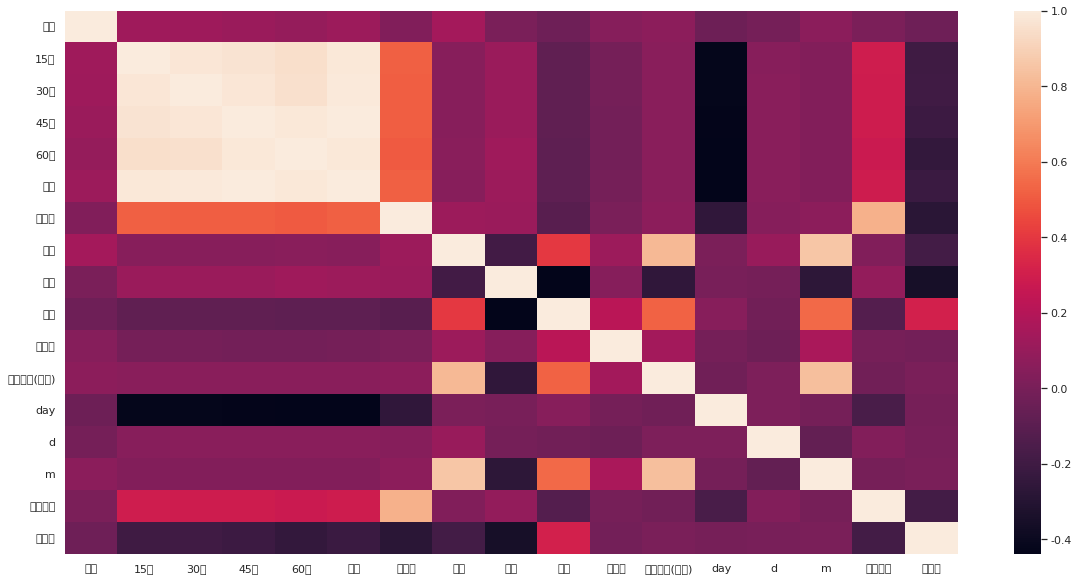

In [243]:
sns.heatmap(df.corr())

In [244]:
df = df.rename(columns= {"15분" : "Peak Consumption in 15 minute",
"30분" : "Peak Consumption in 30 minute",
"45분" : "Peak Consumption in 45 minute",
"60분" : "Peak Consumption in 60 minute",
"평균" : "Average Peak Consumption in 1 hour",
"생산량" :"Yield"})
df

,시간,Peak Consumption in 15 minute,Peak Consumption in 30 minute,Peak Consumption in 45 minute,Peak Consumption in 60 minute,Average Peak Consumption in 1 hour,Yield,기온,풍속,습도,강수량,전기요금(계절),day,d,m,공장인원,인건비
날짜,,,,,,,,,,,,,,,,,
2021-01-01,0,62,61,61,61,61,0,-3.2,2.4,71,0.0,109.8,5,1,1,0.000000,1.5
2021-01-01,1,96,93,116,113,105,0,-4.5,1.5,77,0.0,109.8,5,1,1,0.000000,1.5
2021-01-01,2,106,96,106,107,104,0,-3.9,2.6,58,0.0,109.8,5,1,1,0.000000,1.5
2021-01-01,3,92,110,110,109,105,0,-4.1,2.6,56,0.0,109.8,5,1,1,0.000000,1.5
2021-01-01,4,108,105,106,108,107,0,-4.6,2.6,60,0.0,109.8,5,1,1,0.000000,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-14,19,152,151,171,139,153,1497,21.7,3.6,85,9.4,167.2,2,14,9,2.442088,1.5
2021-09-14,20,124,130,128,130,128,45,22.2,4.2,78,9.4,167.2,2,14,9,0.087891,1.5
2021-09-14,21,134,130,125,124,128,149,22.2,4.3,76,9.4,167.2,2,14,9,0.290448,1.5


In [245]:
df['Peak Consumption in 15 minute'] = [float(str(val).replace('.','').replace(',','.')) for val in df['Peak Consumption in 15 minute'].values]
df['Peak Consumption in 30 minute'] = [float(str(val).replace('.','').replace(',','.')) for val in df['Peak Consumption in 30 minute'].values]
df['Peak Consumption in 45 minute'] = [float(str(val).replace('.','').replace(',','.')) for val in df['Peak Consumption in 45 minute'].values]
df['Peak Consumption in 60 minute'] = [float(str(val).replace('.','').replace(',','.')) for val in df['Peak Consumption in 60 minute'].values]

In [246]:
index_column = pd.date_range(start ='2021-01-01 00:00', end ='2021-09-14 23:00', freq ='H')
df.index = index_column
df.index.names = ['Date']
df

,시간,Peak Consumption in 15 minute,Peak Consumption in 30 minute,Peak Consumption in 45 minute,Peak Consumption in 60 minute,Average Peak Consumption in 1 hour,Yield,기온,풍속,습도,강수량,전기요금(계절),day,d,m,공장인원,인건비
Date,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,0,62.0,61.0,61.0,61.0,61,0,-3.2,2.4,71,0.0,109.8,5,1,1,0.000000,1.5
2021-01-01 01:00:00,1,96.0,93.0,116.0,113.0,105,0,-4.5,1.5,77,0.0,109.8,5,1,1,0.000000,1.5
2021-01-01 02:00:00,2,106.0,96.0,106.0,107.0,104,0,-3.9,2.6,58,0.0,109.8,5,1,1,0.000000,1.5
2021-01-01 03:00:00,3,92.0,110.0,110.0,109.0,105,0,-4.1,2.6,56,0.0,109.8,5,1,1,0.000000,1.5
2021-01-01 04:00:00,4,108.0,105.0,106.0,108.0,107,0,-4.6,2.6,60,0.0,109.8,5,1,1,0.000000,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-14 19:00:00,19,152.0,151.0,171.0,139.0,153,1497,21.7,3.6,85,9.4,167.2,2,14,9,2.442088,1.5
2021-09-14 20:00:00,20,124.0,130.0,128.0,130.0,128,45,22.2,4.2,78,9.4,167.2,2,14,9,0.087891,1.5
2021-09-14 21:00:00,21,134.0,130.0,125.0,124.0,128,149,22.2,4.3,76,9.4,167.2,2,14,9,0.290448,1.5


In [247]:
df['Peak Consumption Max'] = df.iloc[:, 1:5].max(axis=1)
df.head(3)

,시간,Peak Consumption in 15 minute,Peak Consumption in 30 minute,Peak Consumption in 45 minute,Peak Consumption in 60 minute,Average Peak Consumption in 1 hour,Yield,기온,풍속,습도,강수량,전기요금(계절),day,d,m,공장인원,인건비,Peak Consumption Max
Date,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,0,62.0,61.0,61.0,61.0,61,0,-3.2,2.4,71,0.0,109.8,5,1,1,0.0,1.5,62.0
2021-01-01 01:00:00,1,96.0,93.0,116.0,113.0,105,0,-4.5,1.5,77,0.0,109.8,5,1,1,0.0,1.5,116.0
2021-01-01 02:00:00,2,106.0,96.0,106.0,107.0,104,0,-3.9,2.6,58,0.0,109.8,5,1,1,0.0,1.5,107.0


In [248]:
# select the ones with the maximum Peak Consumption Max value for each month
df_max = df.loc[df.groupby(df.index.month)["Peak Consumption Max"].idxmax()]
df_max.index = df_max.index.strftime('%m-%d')
df_max

,시간,Peak Consumption in 15 minute,Peak Consumption in 30 minute,Peak Consumption in 45 minute,Peak Consumption in 60 minute,Average Peak Consumption in 1 hour,Yield,기온,풍속,습도,강수량,전기요금(계절),day,d,m,공장인원,인건비,Peak Consumption Max
Date,,,,,,,,,,,,,,,,,,
01-29,8,190.0,222.0,207.0,189.0,202,364,-6.8,3.9,37,0.0,109.8,5,29,1,0.450495,1.5,222.0
02-15,8,176.0,196.0,198.0,181.0,188,635,10.2,2.7,94,0.5,109.8,1,15,2,0.845539,1.5,198.0
03-29,8,190.0,222.0,207.0,189.0,202,1644,14.0,2.1,72,0.0,167.2,1,29,3,2.034653,1.5,222.0
04-07,8,160.0,191.0,190.0,199.0,185,669,13.6,3.2,43,0.0,167.2,3,7,4,0.904054,1.5,199.0
05-06,8,160.0,191.0,190.0,199.0,185,424,14.6,1.3,31,0.0,167.2,4,6,5,0.572973,1.5,199.0
06-29,8,190.0,222.0,207.0,189.0,202,893,23.3,1.7,77,0.0,191.6,2,29,6,1.105198,1.5,222.0
07-19,11,182.0,222.0,207.0,186.0,199,1280,28.4,1.3,75,0.0,191.6,1,19,7,1.606023,1.0,222.0
08-11,8,176.0,206.0,218.0,212.0,203,783,25.6,1.6,94,0.0,191.6,3,11,8,0.964286,1.5,218.0
09-10,9,182.0,171.0,179.0,204.0,184,1038,21.8,1.5,95,0.2,167.2,5,10,9,1.410326,1.0,204.0


<AxesSubplot:xlabel='시간'>

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0, flags=flags)


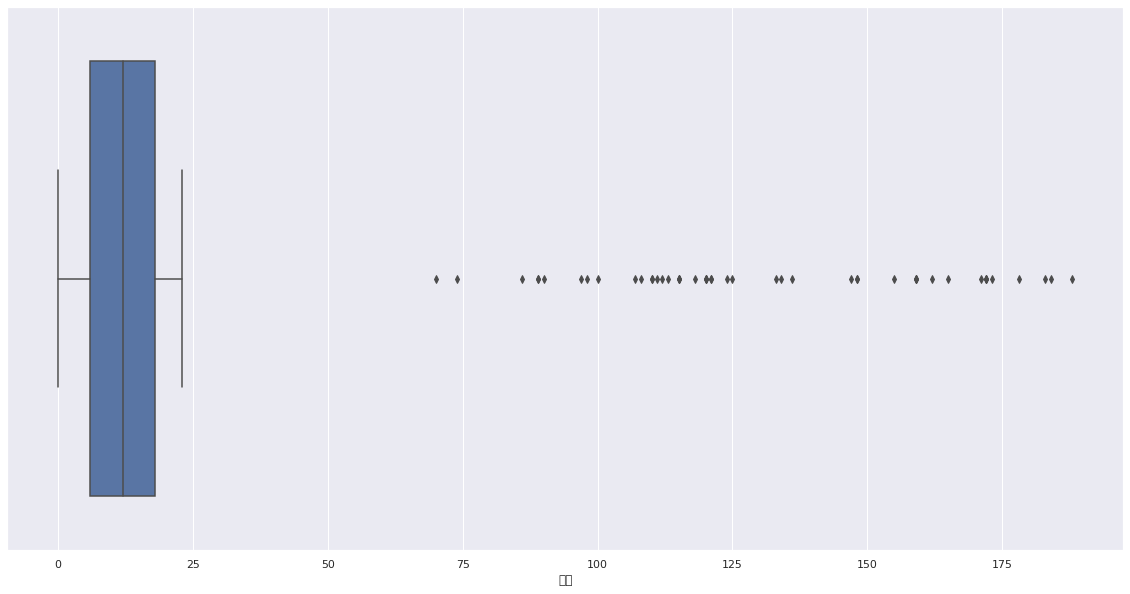

In [249]:
# for c in df.columns.unique():
#     sns.boxplot(data=df, x=c)
#     plt.show()

sns.boxplot(data=df,x='시간')

### From the above boxplot, we find out that there are some strange values for 시간 (Time) columns. Time value should be placed between 0 and 24. We should handle this variable.

<AxesSubplot:xlabel='시간'>

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0, flags=flags)


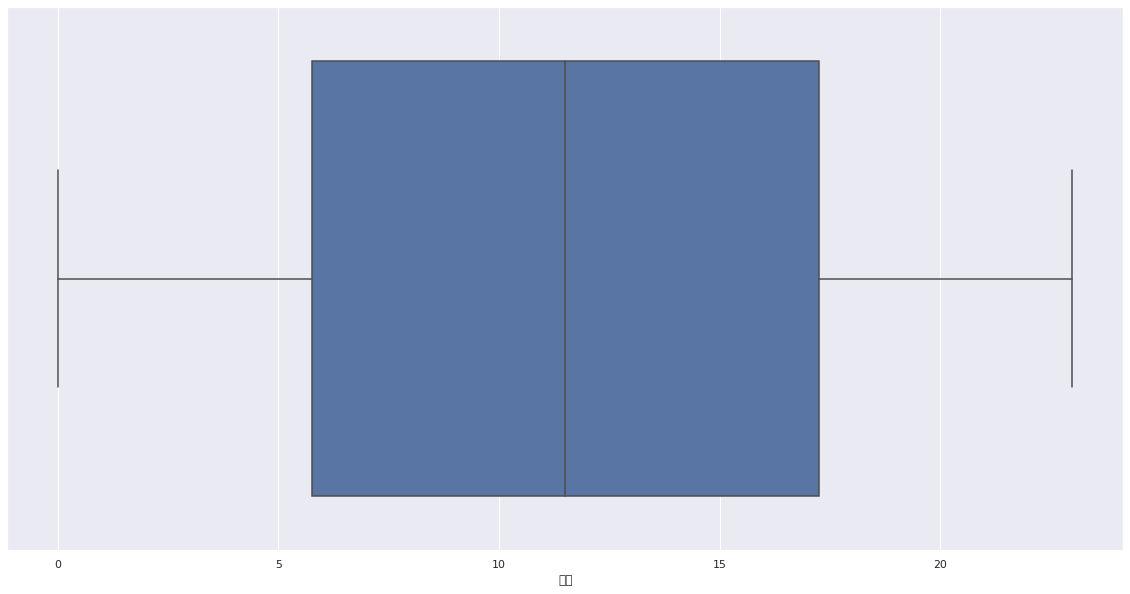

In [250]:
df['시간'] = df.index.hour

sns.boxplot(data=df,x='시간')

### After visualizing the data using a boxplot for each month, there was no clear evidence of outliers. 
### However, when examining the monthly averages, it was observed that August had the lowest average value. 
### This finding is particularly noteworthy as August is typically associated with the hottest summer weather, leading to an expectation of higher consumption. 


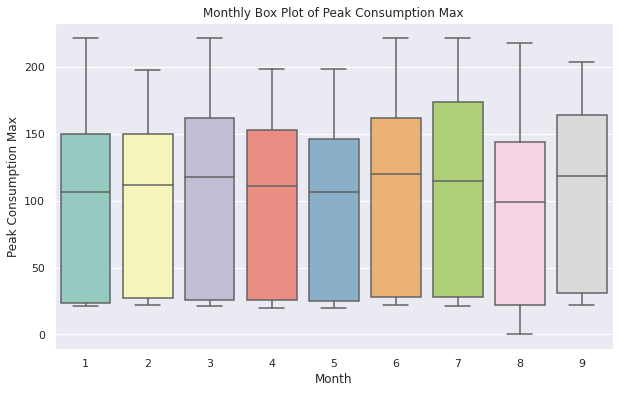

In [251]:
df['Month'] = df.index.month

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Month', y='Peak Consumption Max', palette="Set3")
plt.title("Monthly Box Plot of Peak Consumption Max")
plt.xlabel("Month")
plt.ylabel("Peak Consumption Max")
plt.show()

### Conversely, when looking at the highest values, August stood out as having the highest peak consumption max.

<AxesSubplot:xlabel='Date', ylabel='Peak Consumption Max'>

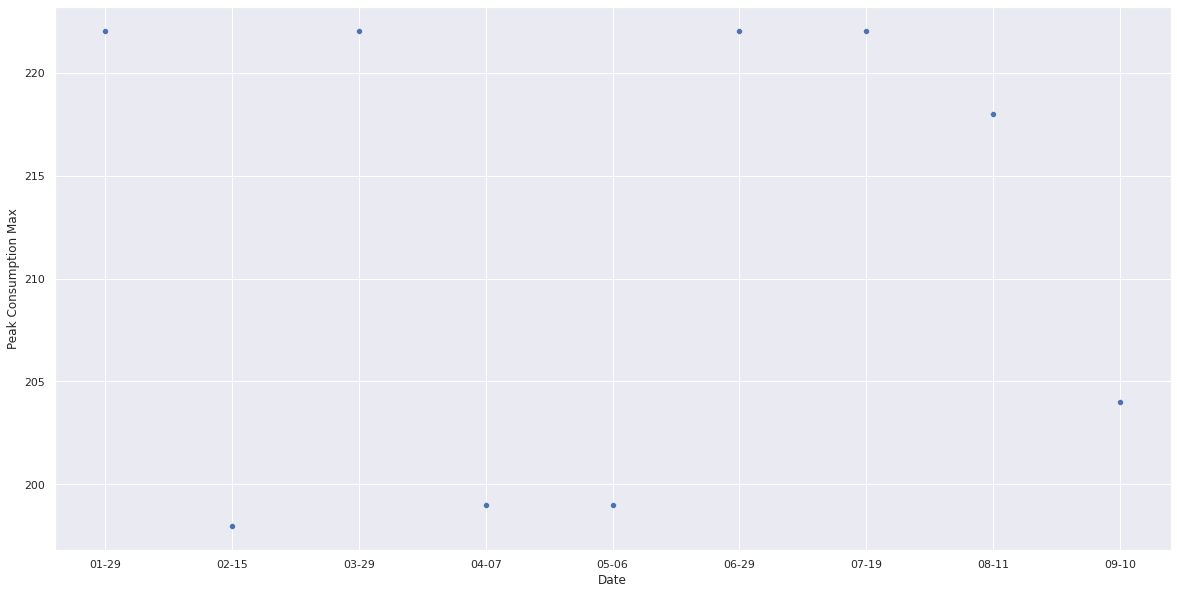

In [252]:
sns.scatterplot(data=df_max, x='Date', y='Peak Consumption Max')


<AxesSubplot:xlabel='Date', ylabel='Peak Consumption Max'>

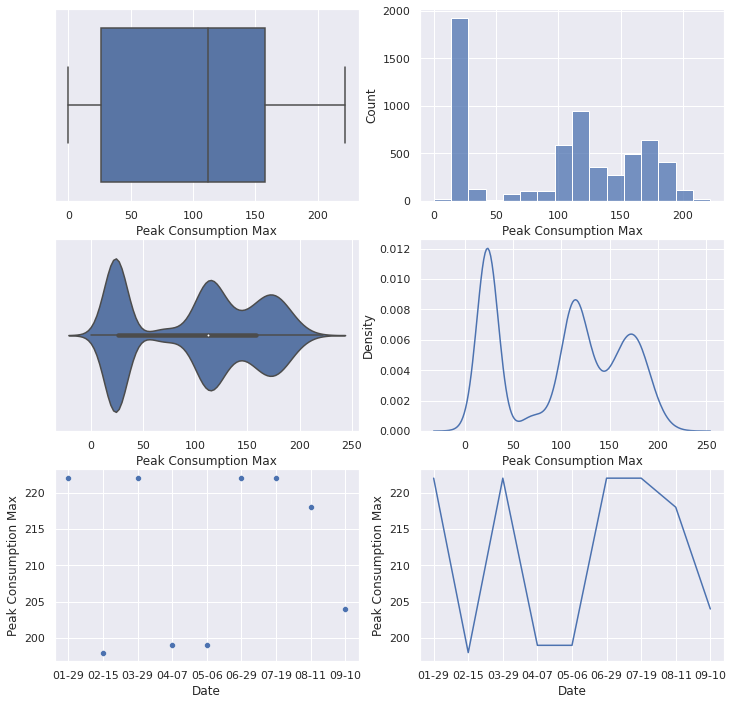

In [253]:
sns.set_style("darkgrid")

fig, axs = plt.subplots(3, 2, figsize=(12, 12)) 

sns.boxplot(data=df,x='Peak Consumption Max',ax=axs[0,0])

sns.histplot(data=df,x='Peak Consumption Max',ax=axs[0,1])

sns.violinplot(data=df,x='Peak Consumption Max',ax=axs[1,0])

sns.kdeplot(data=df,x='Peak Consumption Max',ax=axs[1,1])

sns.scatterplot(data=df_max, x='Date', y='Peak Consumption Max', ax=axs[2, 0])

sns.lineplot(data=df_max,x='Date', y='Peak Consumption Max', ax=axs[2, 1])



<AxesSubplot:xlabel='시간', ylabel='Peak Consumption Max'>

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0, flags=flags)


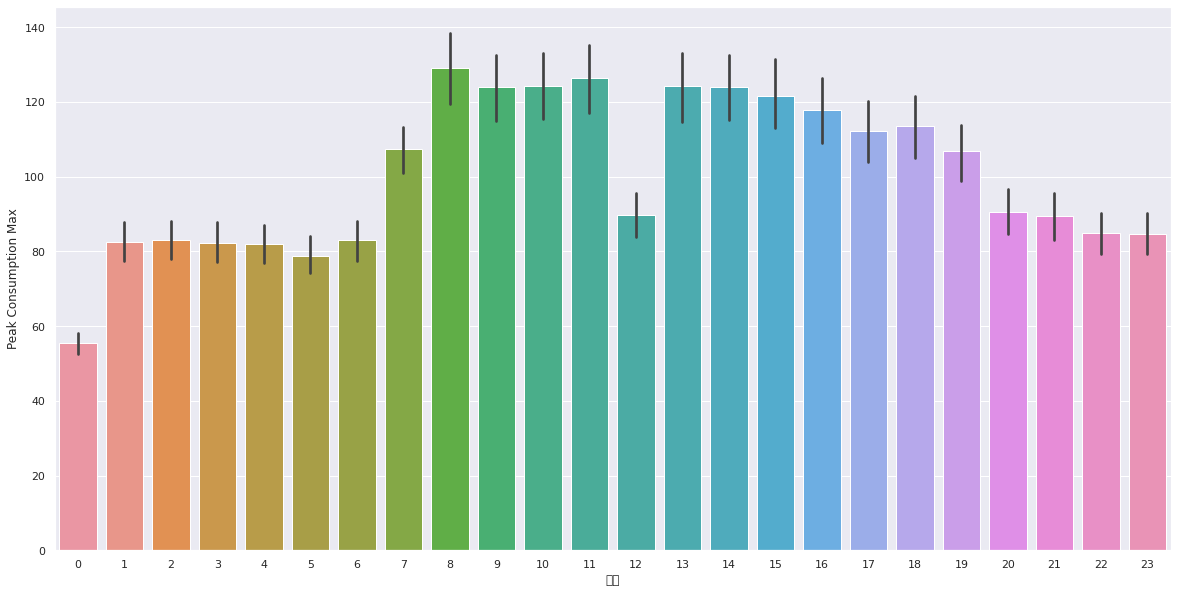

In [254]:
sns.barplot(data=df, x='시간', y = 'Peak Consumption Max')

### We can see that during the working time, comsumption increases. Interestingly, during 12pm, it decreases. Because during lunchtime, manufacturing process also stops.

## Pivot tables

In [286]:
pivot_table = df.pivot_table(index='시간', columns='Month', values='Average Peak Consumption in 1 hour', margins=True, aggfunc=np.mean)
print(pivot_table)

Month           1           2           3           4           5           6  \
시간                                                                              
0       48.161290   61.714286   54.903226   48.566667   46.935484   56.233333   
1       68.322581   94.714286   81.645161   73.700000   69.258065   84.566667   
2       70.161290   97.392857   84.225806   74.533333   71.548387   87.300000   
3       69.935484   95.321429   83.032258   71.600000   68.838710   85.033333   
4       68.483871   97.500000   84.258065   72.866667   70.645161   87.100000   
5       59.354839   82.428571   72.387097   64.300000   61.935484   74.333333   
6       68.419355   96.964286   84.870968   75.433333   71.129032   87.366667   
7       75.258065   96.964286   92.967742   86.633333   78.580645   97.866667   
8      109.870968  106.607143  129.483871  128.500000  115.064516  133.266667   
9       99.225806  107.500000  128.516129  126.566667  112.225806  132.600000   
10      99.483871  103.28571

In [282]:
pivot_table = df.pivot_table(index='시간', columns='Month', values='Peak Consumption Max', margins=True, aggfunc=np.mean)
print(pivot_table)

Month           1           2           3           4           5           6  \
시간                                                                              
0       50.354839   64.464286   57.129032   51.866667   49.838710   58.366667   
1       73.483871  101.035714   88.096774   78.800000   74.193548   90.833333   
2       73.806452  102.642857   88.193548   77.666667   74.838710   91.866667   
3       74.000000  100.678571   87.935484   77.266667   74.096774   90.100000   
4       71.870968  101.178571   87.774194   77.400000   74.354839   90.800000   
5       67.129032   96.214286   82.677419   76.766667   72.161290   85.933333   
6       71.612903  102.035714   89.000000   80.066667   75.645161   91.933333   
7       92.677419  114.964286  111.516129  109.500000  103.032258  118.466667   
8      116.903226  112.000000  137.806452  137.466667  122.419355  141.833333   
9      103.258065  112.392857  133.612903  131.366667  116.516129  138.133333   
10     107.903226  112.14285

In [284]:
pivot_table = df.pivot_table(index='day', columns='Month', values='Peak Consumption Max', margins=True, aggfunc=np.mean)
print(pivot_table)


Month           1           2           3           4           5           6  \
day                                                                             
1      139.291667  142.302083  143.508333  120.406250  109.891667  119.968750   
2       23.125000  140.083333  140.508333  128.010417  136.062500  143.508333   
3       23.125000  141.656250  117.950000  127.843750   91.010417  140.508333   
4      119.968750  139.291667  139.291667  127.533333  120.052083  141.656250   
5      125.616667   51.354167   23.125000  130.525000  128.218750  139.291667   
6      101.950000   51.208333   49.791667   49.072917   47.908333   51.354167   
7       84.216667   23.833333  118.427083   22.104167   40.441667   24.260417   
All     89.708333   98.532738  107.495968  102.668056   93.309140  110.873611   

Month           7           8           9         All  
day                                                    
1      122.156250   94.725000  115.979167  122.948198  
2      148.625000  11

### As observed through the graph visualization, whether it's the average or the maximum, consumption was at its lowest in  12 o' clock. 
### Typically, the period between 8 AM and 4 PM, which aligns with common working hours, saw higher consumption levels.
### As anticipated by all of us, consumption was higher on weekdays than on weekends.

### Conversely, the months of August, typically the hottest of the summer, and January, the coldest of the autumn, recorded the lowest consumption levels, in line with our expectations.